In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

import json
from pandas.io.json import json_normalize

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()


with open('Datos_SIATA_Aire_pm25.json') as f: 
    dataset = json.load(f)

X = json_normalize(dataset,'datos',['nombre','latitud','longitud'])
dataset = json_normalize(dataset)
dataset.head(10)

Saving Datos_SIATA_Aire_pm25.json to Datos_SIATA_Aire_pm25.json


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,latitud,codigoSerial,datos,nombre,nombreCorto,longitud
0,6.379038,3,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.450913
1,6.252561,12,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Estación Tráfico Centro,CEN-TRAF,-75.569580
2,6.263370,25,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...","Medellín, centro occidente - Universidad Naci...",MED-UNNV,-75.577004
3,6.185667,28,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Itagüí - Casa de Justicia Itagüí,ITA-CJUS,-75.597206
4,6.099081,31,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Caldas - Corporacion Universitaria Lasallista,CAL-LASA,-75.638626
5,6.168497,38,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Itagüí - I.E. Concejo Municipal de Itagüí,ITA-CONC,-75.644356
6,6.182542,44,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...","Medellín, El Poblado - Tanques La Ye EPM",MED-LAYE,-75.550636
7,6.152313,48,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Estación Tráfico Sur,SUR-TRAF,-75.627487
8,6.093078,69,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",Caldas - E U Joaquín Aristizabal,CAL-JOAR,-75.637764
9,6.155531,78,"[{'variableConsulta': 'pm25', 'fecha': '2018-0...",La Estrella - Hospital,EST-HOSP,-75.644173


In [3]:

print(X)

       variableConsulta                fecha  ...  latitud  longitud
0                  pm25  2018-08-28 04:00:00  ...  6.37904  -75.4509
1                  pm25  2018-08-28 05:00:00  ...  6.37904  -75.4509
2                  pm25  2018-08-28 06:00:00  ...  6.37904  -75.4509
3                  pm25  2018-08-28 07:00:00  ...  6.37904  -75.4509
4                  pm25  2018-08-28 08:00:00  ...  6.37904  -75.4509
...                 ...                  ...  ...      ...       ...
183976             pm25  2019-08-28 00:00:00  ...  6.14548  -75.6214
183977             pm25  2019-08-28 01:00:00  ...  6.14548  -75.6214
183978             pm25  2019-08-28 02:00:00  ...  6.14548  -75.6214
183979             pm25  2019-08-28 03:00:00  ...  6.14548  -75.6214
183980             pm25  2019-08-28 04:00:00  ...  6.14548  -75.6214

[183981 rows x 7 columns]


In [4]:

X=X.drop(['variableConsulta', 'calidad'], axis=1)  
X = X.values
print(X)

[['2018-08-28 04:00:00' 15.0 'Girardota - S.O.S Aburrá Norte' 6.3790379
  -75.4509125]
 ['2018-08-28 05:00:00' 20.0 'Girardota - S.O.S Aburrá Norte' 6.3790379
  -75.4509125]
 ['2018-08-28 06:00:00' 29.0 'Girardota - S.O.S Aburrá Norte' 6.3790379
  -75.4509125]
 ...
 ['2019-08-28 02:00:00' 15.5873 'Sabaneta - I.E. Rafael J. Mejía'
  6.1454778 -75.6214142]
 ['2019-08-28 03:00:00' 20.3708 'Sabaneta - I.E. Rafael J. Mejía'
  6.1454778 -75.6214142]
 ['2019-08-28 04:00:00' 17.9231 'Sabaneta - I.E. Rafael J. Mejía'
  6.1454778 -75.6214142]]


In [5]:
# Cuidado aqui los valores por debajo de 0.0 se entiende que no hubo sensado, y los valores por encima de 151 se hacen iguales a un valor maximo entendiendo 
# un sensado alto, se deja a evaluacion que si dicho valor alto es seguido por valores pequenos debe entenderse entonces como un error en el sensor.

for i in range(183981):
  if (X[i,1:2] < 0.0):
    X[i,1:2] = 0.0
  if (X[i,1:2] > 151.0):
    X[i,1:2] = 160.0
    

In [6]:
# Separacion de los datos por estacion de medicion.
# Atencion los primeros 720 datos DE CADA itervalo corresponde al primer mes de cada estacion.

Xa = X[0:8761,:]          # 'Girardota - S.O.S Aburrá Norte'
Xb = X[8761:17522,:]      # 'Estación Tráfico Centro'
Xc = X[17522:26283,:]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
Xd = X[26283:35044,:]     # 'Itagüí - Casa de Justicia Itagüí'
Xe = X[35044:43805,:]     # 'Caldas - Corporacion Universitaria Lasallista'
Xf = X[43805:52566,:]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
Xg = X[52566:61327,:]     # 'Medellín, El Poblado - Tanques La Ye EPM'
Xh = X[61327:70088,:]     # 'Estación Tráfico Sur'
Xi = X[70088:78849,:]     # 'Caldas - E U Joaquín Aristizabal'
Xj = X[78849:87610,:]     # 'La Estrella - Hospital'
Xk = X[87610:96371,:]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
Xl = X[96371:105132,:]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
Xm = X[105132:113893,:]   # 'Barbosa - Torre Social'
Xn = X[113893:122654,:]   # 'Copacabana - Ciudadela Educativa La Vida'
Xo = X[122654:131415,:]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
Xp = X[131415:140176,:]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
Xq = X[140176:148937,:]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
Xr = X[148937:157698,:]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
Xs = X[157698:166459,:]   # 'Bello - I.E. Fernando Vélez'
Xt = X[166459:175220,:]   # 'Envigado - E.S.E. Santa Gertrudis'
Xu = X[175220:183981,:]   # 'Sabaneta - I.E. Rafael J. Mejía'

In [7]:
# Funcion para dibujar la senal de DOS formas diferentes enviandole el mes, el dia y la estacion.

def plot_mes (Y, a, b):
  #a= float(a)
  b= int(b)
  ver = Y[720*a:720+720*a, :]
  c = 720  
  if (b > 0):
    ver = ver[24*b:24+24*b, :]
    c = 24

  plt.figure(figsize=(20,10))
  t=np.linspace(0, c, c)
  plt.plot(t,ver[:,1])
  plt.title('Material Particulado PM 2.5', pad = 20, fontdict={'fontsize':20, 'color': '#4873ab'})
  plt.xlabel('Horas')
  plt.ylabel('PM 2.5')
  plt.minorticks_on()
  plt.grid(b=True, which='minor')
  plt.grid()
  plt.show()

  import plotly.express as px

  #fig = px.line(ver, x= ver[:,0], y = ver[:,1])

  ver = pd.DataFrame(ver)
  ver.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']
  fig = px.line(ver, x = 'Fecha', y = 'Q(Aire)')
  
  fig.show()

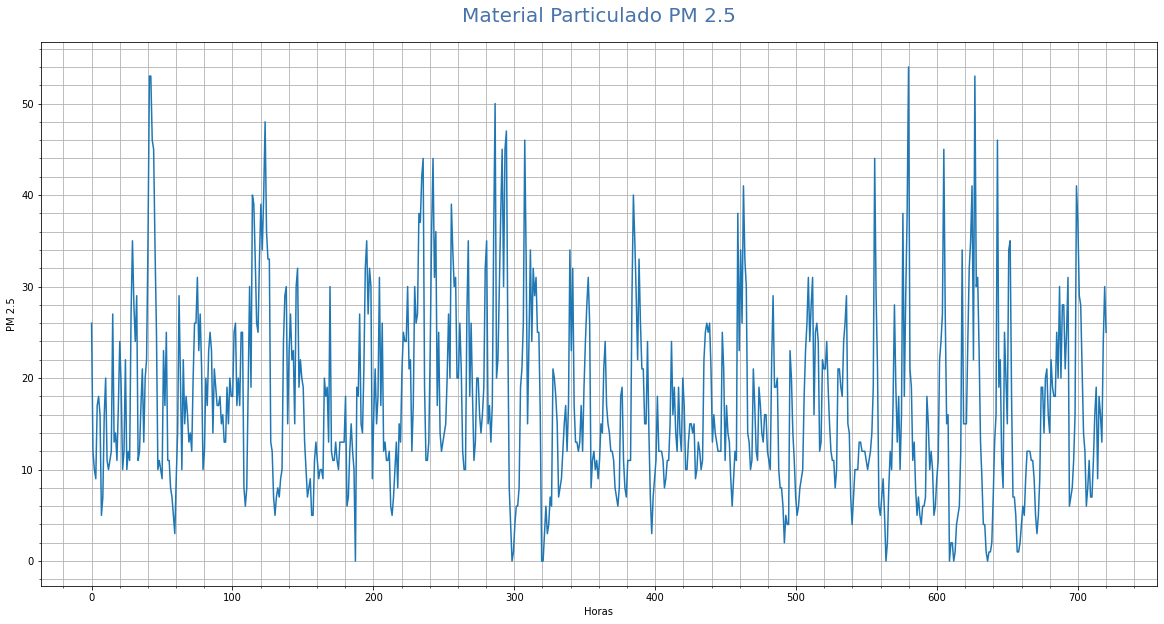

In [8]:
# Si en dia_selec se escoge 0 (ZERO) se plotea todo el mes.

meses_dic = {'Septiembre(2018)' : 0, 'Octubre(2018)' : 1, 'Noviembre(2018)' : 2, 'Diciembre(2018)' : 3, 'Enero(2019)' : 4, 'Febrero(2019)' : 5, 'Marzo(2019)' : 6, 
         'Abril(2019)' : 7, 'Mayo(2019)' : 8, 'junio(2019)' : 9, 'Julio(2019)' : 10, 'Agosto(2019)' : 11}
estacion_dic = {'Girardota - S.O.S Aburra Norte' : Xa, 'Estacion Trafico Centro' : Xb, 'Medellin,  centro occidente - Universidad Nacional, sede El Volador' : Xc,
             'Itagui - Casa de Justicia Itagui' : Xd, 'Caldas - Corporacion Universitaria Lasallista' : Xe, 'Itagui - I.E. Concejo Municipal de Itagui' : Xf,
             'Medellin, El Poblado - Tanques La Ye EPM' : Xg, 'Estacion Trafico Sur' : Xh, 'Caldas - E U Joaquin Aristizabal' : Xi,
             'La Estrella - Hospital' : Xj, 'Medellin, Altavista - I.E. Pedro Octavio Amado' : Xk, 'Medellin, Villahermosa - Planta de produccion de agua potable EPM' : Xl,
             'Barbosa - Torre Social' : Xm, 'Copacabana - Ciudadela Educativa La Vida' : Xn, 'Medellin, Belen - I.E Pedro Justo Berrio' : Xo, 
             'Medellin, El Poblado - I.E INEM sede Santa Catalina' : Xp, 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero' : Xq,
             'Medellin, Aranjuez - I.E Ciro Mendia' : Xr, 'Bello - I.E. Fernando Velez' : Xs, 'Envigado - E.S.E. Santa Gertrudis' : Xt, 
             'Sabaneta - I.E. Rafael J. Mejia' : Xu}

estacion_selec = 'Itagui - Casa de Justicia Itagui'  # @param ['Girardota - S.O.S Aburra Norte', 'Estacion Trafico Centro', 'Medellin,  centro occidente - Universidad Nacional, sede El Volador', 'Itagui - Casa de Justicia Itagui', 'Caldas - Corporacion Universitaria Lasallista', 'Itagui - I.E. Concejo Municipal de Itagui', 'Medellin, El Poblado - Tanques La Ye EPM', 'Estacion Trafico Sur', 'Caldas - E U Joaquin Aristizabal', 'La Estrella - Hospital', 'Medellin, Altavista - I.E. Pedro Octavio Amado', 'Medellin, Villahermosa - Planta de produccion de agua potable EPM', 'Barbosa - Torre Social', 'Copacabana - Ciudadela Educativa La Vida', 'Medellin, Belen - I.E Pedro Justo Berrio', 'Medellin, El Poblado - I.E INEM sede Santa Catalina', 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero', 'Medellin, Aranjuez - I.E Ciro Mendia', 'Bello - I.E. Fernando Velez', 'Envigado - E.S.E. Santa Gertrudis', 'Sabaneta - I.E. Rafael J. Mejía']
mes_selec = 'Julio(2019)'  # @param ['Septiembre(2018)', 'Octubre(2018)', 'Noviembre(2018)', 'Diciembre(2018)', 'Enero(2019)', 'Febrero(2019)', 'Marzo(2019)', 'Abril(2019)', 'Mayo(2019)', 'junio(2019)', 'Julio(2019)', 'Agosto(2019)']
dia_selec = "0"  # @param [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


plot_mes((estacion_dic[estacion_selec]), meses_dic[mes_selec], dia_selec)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



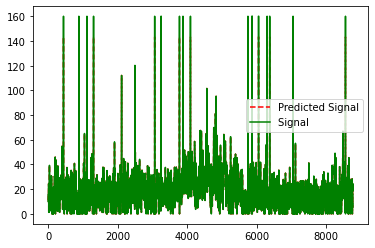

R2= 0.9928594055431292


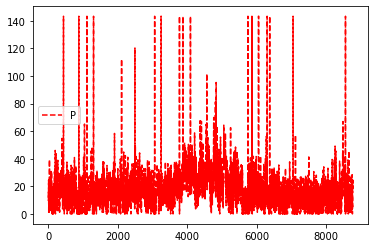

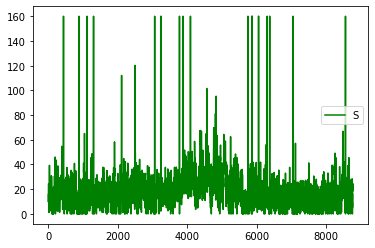

In [9]:
# Entrenamiento del modelo

from sklearn.svm import SVR

model = SVR(kernel='rbf', C = 125, epsilon=1e-3, gamma=20) # C = Parametro de regularizacion , epsilon es la tolerancia en el rango (tube).

data = Xp[:,1:2]
t = np.linspace(0, data.size, data.size).reshape(data.size,1)
t1 =  np.linspace(0, data.size+500, data.size+500).reshape(data.size+500,1)

model.fit(t,data)

y_pred = model.predict(t)

#plt.figure(figsize=(15,15))
plt.plot(t,y_pred,'--r')
plt.plot(t,data,'-g')
plt.legend(('Predicted Signal','Signal '))
plt.show()

print('R2=',r2_score(data,y_pred))

plt.plot(t,y_pred,'--r')
plt.legend('Predicted Signal')
plt.show()
plt.plot(t,data,'-g')
plt.legend('Signal ')
plt.show()

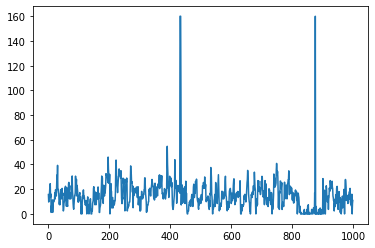

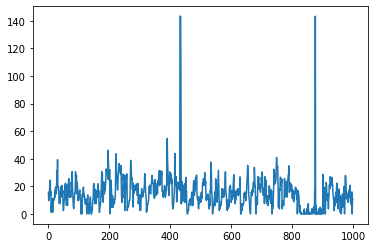

In [10]:

plt.plot(t[:1000],data[:1000])
plt.show()

plt.plot(t[:1000],y_pred[:1000])
plt.show()

**Acercamiento al uso de mapas**

In [11]:
# Algunas librerias que he usado


!pip install geojson
!pip install geopandas
!pip install geojsonio




     |████████████████████████████████| 972kB 7.9MB/s 
     |████████████████████████████████| 6.5MB 13.9MB/s 
     |████████████████████████████████| 14.8MB 320kB/s 
     |████████████████████████████████| 153kB 6.7MB/s 
     |████████████████████████████████| 81kB 4.7MB/s 
     |████████████████████████████████| 2.6MB 9.7MB/s 
  Created wheel for geojsonio: filename=geojsonio-0.0.3-cp36-none-any.whl size=5038 sha256=81425602448b00ab206b4116b1957746ce570ac3daf2ef340ae664ae17b3dae2
  Stored in directory: /root/.cache/pip/wheels/a9/ef/7c/7bbf228825e8717adaa84cd4b6c4ed8649b7958dd2bac45076
Successfully built geojsonio


In [12]:
import geojson
import geopandas as gpd
import geojsonio

In [13]:
from google.colab import files
uploaded = files.upload()

# se carga el dataset
#dataset=pd.read_json('Datos_SIATA_Aire_pm25.json')

#with open('/D:\Escritorio\SEÑALES 3/Datos_SIATA_Aire_pm25.json') as f:
#   dataset = json.load(f)

with open('Area_Met_01.geojson') as f: 
    dataset = json.load(f)



Saving Area_Met_01.geojson to Area_Met_01.geojson


In [14]:
states = gpd.read_file('Area_Met_01.geojson')
states.head()

,id,AREA,DPTO_CCDGO,LATITUD,LONGITUD,MPIO_CCDGO,MPIO_CDPMP,MPIO_CNMBR,Shape_Area,Shape_Leng,VERSION,geometry
0,282,3.748306e+08,05,6.257590,-75.611031,001,05001,MEDELLÍN,0.030607,1.032922,2018,"MULTIPOLYGON (((-75.66974 6.37360, -75.66965 6..."
1,289,1.477584e+08,05,6.358841,-75.589736,088,05088,BELLO,0.012068,0.614364,2018,"MULTIPOLYGON (((-75.58203 6.42510, -75.58157 6..."
2,291,2.056662e+08,05,6.443418,-75.329241,079,05079,BARBOSA,0.016804,0.770018,2018,"MULTIPOLYGON (((-75.32144 6.51265, -75.32140 6..."
3,331,7.799670e+07,05,6.154395,-75.546868,266,05266,ENVIGADO,0.006368,0.480262,2018,"MULTIPOLYGON (((-75.52651 6.19632, -75.52602 6..."
4,336,6.776072e+07,05,6.351883,-75.500756,212,05212,COPACABANA,0.005535,0.513073,2018,"MULTIPOLYGON (((-75.49086 6.42228, -75.49104 6..."


In [15]:
states.columns

Index(['id', 'AREA', 'DPTO_CCDGO', 'LATITUD', 'LONGITUD', 'MPIO_CCDGO',
       'MPIO_CDPMP', 'MPIO_CNMBR', 'Shape_Area', 'Shape_Leng', 'VERSION',
       'geometry'],
      dtype='object')

In [16]:
states

,id,AREA,DPTO_CCDGO,LATITUD,LONGITUD,MPIO_CCDGO,MPIO_CDPMP,MPIO_CNMBR,Shape_Area,Shape_Leng,VERSION,geometry
0,282,3.748306e+08,05,6.257590,-75.611031,001,05001,MEDELLÍN,0.030607,1.032922,2018,"MULTIPOLYGON (((-75.66974 6.37360, -75.66965 6..."
1,289,1.477584e+08,05,6.358841,-75.589736,088,05088,BELLO,0.012068,0.614364,2018,"MULTIPOLYGON (((-75.58203 6.42510, -75.58157 6..."
2,291,2.056662e+08,05,6.443418,-75.329241,079,05079,BARBOSA,0.016804,0.770018,2018,"MULTIPOLYGON (((-75.32144 6.51265, -75.32140 6..."
3,331,7.799670e+07,05,6.154395,-75.546868,266,05266,ENVIGADO,0.006368,0.480262,2018,"MULTIPOLYGON (((-75.52651 6.19632, -75.52602 6..."
4,336,6.776072e+07,05,6.351883,-75.500756,212,05212,COPACABANA,0.005535,0.513073,2018,"MULTIPOLYGON (((-75.49086 6.42228, -75.49104 6..."
5,350,1.327559e+08,05,6.054447,-75.626427,129,05129,CALDAS,0.010836,0.529328,2018,"MULTIPOLYGON (((-75.66629 6.11848, -75.66629 6..."
6,389,1.964956e+07,05,6.179279,-75.614204,360,05360,ITAGÜÍ,0.001604,0.212419,2018,"MULTIPOLYGON (((-75.60070 6.20017, -75.60061 6..."
7,397,8.285600e+07,05,6.379746,-75.447957,308,05308,GIRARDOTA,0.006768,0.415671,2018,"MULTIPOLYGON (((-75.44746 6.43418, -75.44734 6..."
8,1120,1.583532e+07,05,6.138305,-75.608806,631,05631,SABANETA,0.001293,0.172905,2018,"MULTIPOLYGON (((-75.60355 6.15510, -75.60350 6..."
9,1121,3.663179e+07,05,6.137596,-75.648955,380,05380,LA ESTRELLA,0.002990,0.284163,2018,"MULTIPOLYGON (((-75.65229 6.17061, -75.65216 6..."


In [17]:
X = pd.DataFrame(X)
X.columns =['Fecha', 'Q(Aire)', 'Sensor', 'latitud', 'longitud']
X1 = gpd.GeoDataFrame(X)
states['Sensor'] = [100,63,26,115,21,87,94,80,102,124]   # Esto para ejemplo evaluacion
states
X1

,Fecha,Q(Aire),Sensor,latitud,longitud
0,2018-08-28 04:00:00,15,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
1,2018-08-28 05:00:00,20,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
2,2018-08-28 06:00:00,29,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
3,2018-08-28 07:00:00,22,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
4,2018-08-28 08:00:00,29,Girardota - S.O.S Aburrá Norte,6.37904,-75.4509
...,...,...,...,...,...
183976,2019-08-28 00:00:00,15.6297,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214
183977,2019-08-28 01:00:00,18.0261,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214
183978,2019-08-28 02:00:00,15.5873,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214
183979,2019-08-28 03:00:00,20.3708,Sabaneta - I.E. Rafael J. Mejía,6.14548,-75.6214


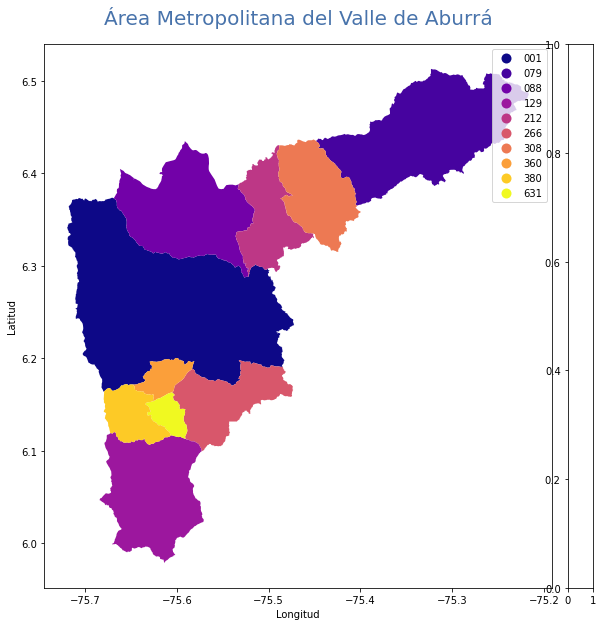

In [19]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Área Metropolitana del Valle de Aburrá', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Mostrar el mapa finalizado
#states.plot(column='Sensor', cmap='plasma', ax=ax, zorder=5)
states.plot(column='MPIO_CCDGO', cmap='plasma', ax=ax, # cmap='plasma'
              legend=True, cax=cax, zorder=5)

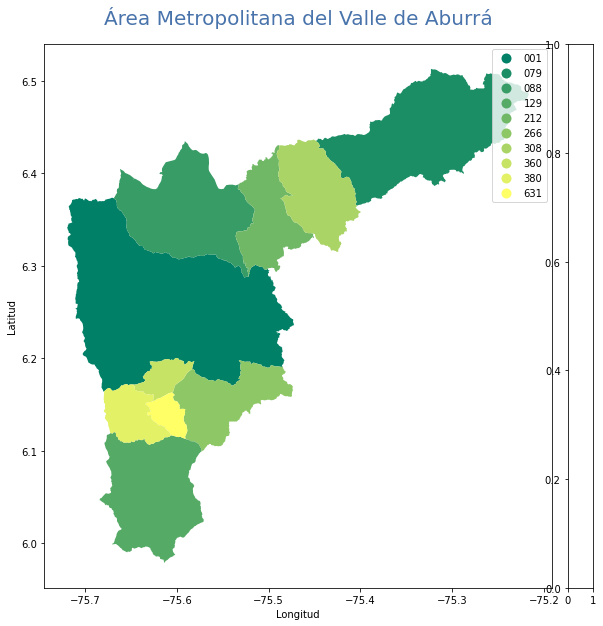

In [23]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
#ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Área Metropolitana del Valle de Aburrá', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
states.plot(column='MPIO_CCDGO', cmap='summer', ax=ax, # cmap='plasma'
              legend=True, cax=cax, zorder=5)

**SANTIAGO** 

**TRABAJANDO CON SKTIME**


In [20]:
!pip install sktime

     |████████████████████████████████| 5.6MB 5.5MB/s 
     |████████████████████████████████| 22.2MB 30.7MB/s 
     |████████████████████████████████| 9.5MB 185kB/s 
     |████████████████████████████████| 3.2MB 23.8MB/s 
     |████████████████████████████████| 25.3MB 41.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0


In [42]:
import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

In [35]:

nom_estaciones=['Girardota - S.O.S Aburra Norte', 'Estacion Trafico Centro', 'Medellin,  centro occidente - Universidad Nacional, sede El Volador',
             'Itagui - Casa de Justicia Itagui', 'Caldas - Corporacion Universitaria Lasallista', 'Itagui - I.E. Concejo Municipal de Itagui',
             'Medellin, El Poblado - Tanques La Ye EPM', 'Estacion Trafico Sur', 'Caldas - E U Joaquin Aristizabal',
             'La Estrella - Hospital', 'Medellin, Altavista - I.E. Pedro Octavio Amado', 'Medellin, Villahermosa - Planta de produccion de agua potable EPM',
             'Barbosa - Torre Social', 'Copacabana - Ciudadela Educativa La Vida', 'Medellin, Belen - I.E Pedro Justo Berrio', 
             'Medellin, El Poblado - I.E INEM sede Santa Catalina', 'Medellin, San Cristobal - Parque Biblioteca Fernando Botero',
             'Medellin, Aranjuez - I.E Ciro Mendia', 'Bello - I.E. Fernando Velez', 'Envigado - E.S.E. Santa Gertrudis', 
             'Sabaneta - I.E. Rafael J. Mejia']


Valores=X['Q(Aire)']


valor=Valores.tolist()

# separo los valores por estaciones
xa = valor[0:8761]         # 'Girardota - S.O.S Aburrá Norte'
xb = valor[8761:17522]     # 'Estación Tráfico Centro'
xc = valor[17522:26283]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
xd = valor[26283:35044]     # 'Itagüí - Casa de Justicia Itagüí'
xe = valor[35044:43805]     # 'Caldas - Corporacion Universitaria Lasallista'
xf = valor[43805:52566]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
xg = valor[52566:61327]     # 'Medellín, El Poblado - Tanques La Ye EPM'
xh = valor[61327:70088]     # 'Estación Tráfico Sur'
xi = valor[70088:78849]     # 'Caldas - E U Joaquín Aristizabal'
xj = valor[78849:87610]     # 'La Estrella - Hospital'
xk = valor[87610:96371]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
xl = valor[96371:105132]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
xm = valor[105132:113893]   # 'Barbosa - Torre Social'
xn = valor[113893:122654]   # 'Copacabana - Ciudadela Educativa La Vida'
xo = valor[122654:131415]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
xp = valor[131415:140176]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
xq = valor[140176:148937]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
xr = valor[148937:157698]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
xs = valor[157698:166459]   # 'Bello - I.E. Fernando Vélez'
xt = valor[166459:175220]   # 'Envigado - E.S.E. Santa Gertrudis'
xu = valor[175220:183981]   # 'Sabaneta - I.E. Rafael J. Mejía'

Fechas = X['Fecha']

fecha = Fechas.to_list()

fa = fecha[0:8761]         # 'Girardota - S.O.S Aburrá Norte'
fb = fecha[8761:17522]     # 'Estación Tráfico Centro'
fc = fecha[17522:26283]     # 'Medellín,  centro occidente - Universidad Nacional, sede El Volador'
fd = fecha[26283:35044]     # 'Itagüí - Casa de Justicia Itagüí'
fe = fecha[35044:43805]     # 'Caldas - Corporacion Universitaria Lasallista'
ff = fecha[43805:52566]     # 'Itagüí - I.E. Concejo Municipal de Itagüí'
fg = fecha[52566:61327]     # 'Medellín, El Poblado - Tanques La Ye EPM'
fh = fecha[61327:70088]     # 'Estación Tráfico Sur'
fi = fecha[70088:78849]     # 'Caldas - E U Joaquín Aristizabal'
fj = fecha[78849:87610]     # 'La Estrella - Hospital'
fk = fecha[87610:96371]     # 'Medellín, Altavista - I.E. Pedro Octavio Amado'
fl = fecha[96371:105132]    # 'Medellín, Villahermosa - Planta de producción de agua potable EPM'
fm = fecha[105132:113893]   # 'Barbosa - Torre Social'
fn = fecha[113893:122654]   # 'Copacabana - Ciudadela Educativa La Vida'
fo = fecha[122654:131415]   # 'Medellin, Belén - I.E Pedro Justo Berrio'
fp = fecha[131415:140176]   # 'Medellín, El Poblado - I.E INEM sede Santa Catalina'
fq = fecha[140176:148937]   # 'Medellín, San Cristobal - Parque Biblioteca Fernando Botero'
fr = fecha[148937:157698]   # 'Medellín, Aranjuez - I.E Ciro Mendia'
fs = fecha[157698:166459]   # 'Bello - I.E. Fernando Vélez'
ft = fecha[166459:175220]   # 'Envigado - E.S.E. Santa Gertrudis'
fu = fecha[175220:183981]   # 'Sabaneta - I.E. Rafael J. Mejía'

In [36]:
estaciones = [xa,xb,xc,xd,xe,xf,xg,xh,xi,xj,xk,xl,xm,xn,xo,xp,xq,xr,xs,xt,xu]

print('cantidad de estaciones: '+str(len(estaciones)))

cantidad de estaciones: 21


**PREDICCION**

In [37]:
Za=pd.Series(xa[0:720],fa[0:720])
Za.index = pd.PeriodIndex(Za.index, freq="H", name="Period")

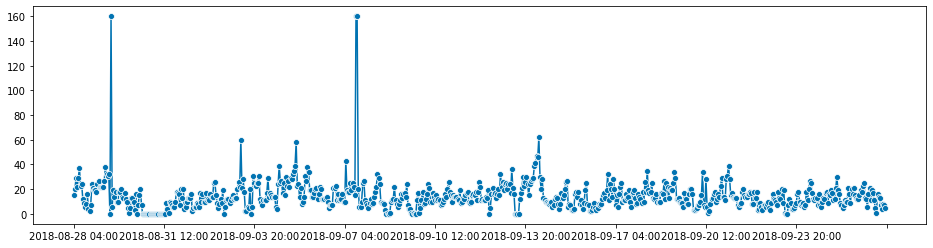

In [27]:
plot_series(Za);

180 180


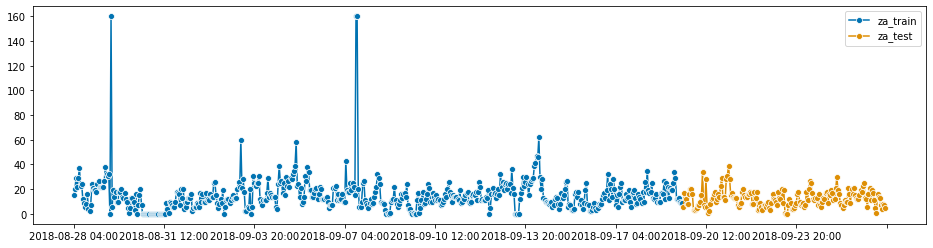

In [38]:
za_train, za_test = temporal_train_test_split(Za, test_size=180)
plot_series(za_train, za_test, labels=["za_train", "za_test"])
print(za_test.shape[0], za_test.shape[0])


In [39]:
fh = ForecastingHorizon(za_test.index, is_relative=False)
fh

ForecastingHorizon(['2018-09-19 16:00', '2018-09-19 17:00', '2018-09-19 18:00',
             '2018-09-19 19:00', '2018-09-19 20:00', '2018-09-19 21:00',
             '2018-09-19 22:00', '2018-09-19 23:00', '2018-09-20 00:00',
             '2018-09-20 01:00',
             ...
             '2018-09-26 18:00', '2018-09-26 19:00', '2018-09-26 20:00',
             '2018-09-26 21:00', '2018-09-26 22:00', '2018-09-26 23:00',
             '2018-09-27 00:00', '2018-09-27 01:00', '2018-09-27 02:00',
             '2018-09-27 03:00'],
            dtype='period[H]', name='Period', length=180, freq='H', is_relative=False)

0.5088186580701144

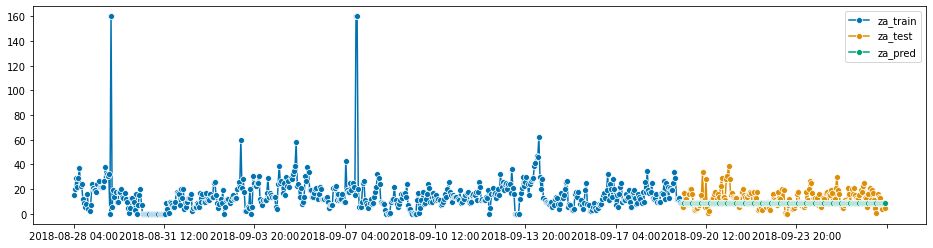

In [40]:

forecaster = NaiveForecaster(strategy="last") # primero creamos el modelo sin especificar la periocida estacional
forecaster.fit(za_train) #entrenamos el modelo
za_pred = forecaster.predict(fh) # predecimos 
plot_series(za_train, za_test, za_pred, labels=["za_train", "za_test", "za_pred"]) # graficamos
smape_loss(za_pred, za_test) # ca

0.48816088076652775

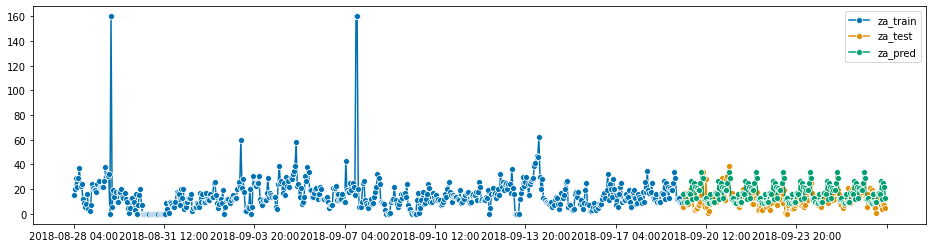

In [41]:
forecaster = NaiveForecaster(strategy="last", sp=24)
forecaster.fit(za_train)
za_pred = forecaster.predict(fh)
plot_series(za_train, za_test, za_pred, labels=["za_train", "za_test", "za_pred"])
smape_loss(za_pred, za_test)